In [1]:
using LinearAlgebra 
#using Gadfly  
using Plots
using StaticArrays 
using SparseArrays 
using Arpack 
global N=3;
global M=3;
global D=Int((factorial(M+N-1))/(factorial(M-1)*factorial(N)))
#funcion primos 
p(i)=100i+3
#Generamos la base en orden lexicografico para N=M=3
v = []; 
i=1;
for n1 in 0:N  
    for n2 in 0:(N-n1)  
        for n3 in 0:(N-n1-n2)  
            if n1+n2+n3 != N
                continue 
            end
            pushfirst!(v, [n1,n2,n3]) 
        end
    end
end   

In [2]:
function tag(b,M)
    tag=0;
    for i in 1:M
        tag += (√p(i))*b[i] 
    end
    return tag 
end

tag (generic function with 1 method)

In [3]:
function creation_ann(k,j,v)     
    if(v[j] >= 1) 
        b = copy(v)
        value = sqrt(((b[k])+1)*b[j])
        b[j] -= 1; 
        b[k] += 1;    
        return [value , b]   
    else 
        return 0; 
    end 
end   

creation_ann (generic function with 1 method)

In [153]:
function creationanG(k,j,v)     
    if(v[j] > 0)  
        b = copy(v)
        value = sqrt(((v[k])+1)*v[j]) 
        b[j] -= 1 
        b[k] += 1    
        return (value*dot(b,v))     
    else 
        return 0; 
    end 
end   

creationanG (generic function with 1 method)

In [4]:
#Valores de la diagonal de los numeros de ocupacion
function valdiags(k, v, M)  
    if(v[k] >= 1)  
        return  (v[k]*(v[k]-1))/2  
    else 
        return 0;
    end  
end       

valdiags (generic function with 1 method)

In [5]:
#Array de tags 
T = []
for i in 1:length(v) 
     push!(T,  tag( v[i] , M )) 
end

In [6]:
#Ordenamos y hacemos un diccionario Tsorted => indices
inds = sortperm(T);
Tsorted = T[inds];
DictOfInds = Dict(zip(Tsorted, inds)) 
#Dict(inds .=> Tsorted)

Dict{Any, Int64} with 10 entries:
  30.4467 => 1
  34.5456 => 2
  42.7434 => 7
  44.9627 => 6
  41.8036 => 5
  49.0616 => 9
  38.6445 => 4
  37.7047 => 3
  45.9025 => 8
  52.2207 => 10

Any[3.0, 1.0, 1.0, 1.0, 0.0, 1.0, 3.0, 1.0, 1.0, 3.0]


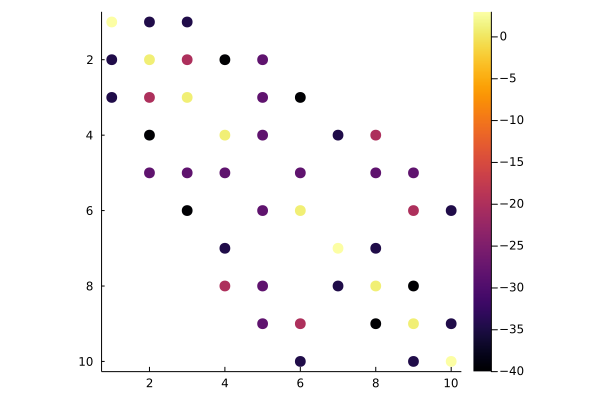

In [186]:
#for t in 1:10
#    J=10
#    U=t*J*0.1 
#obtener H_int 
diagscomp = [];
for j in 1:D 
    sumsdeocup = []; 
    for k in 1:M
        push!(sumsdeocup, valdiags(k, v[j], M))
    end  
    push!(diagscomp, sum(sumsdeocup))    
end   
#Mostramos la parte  
println(diagscomp)
Hint = spzeros(D,D)
Hint[diagind(Hint)] = diagscomp; Hint 
#println(Hint)
#Hint=diagm(diagscomp) 
#spy(Hint) 
J = 20
Hkin = spzeros(D,D)
firstcolumn = [] 
for j in 1:D
    for k in 1:M 
        for h in 1:M   
            if k == h 
                break 
            elseif creation_ann(k,h,v[j]) == 0 
                continue 
            else 
                 Hkin[DictOfInds[tag(creation_ann( k, h , v[j] )[2],M)], j] = -J*(creation_ann( k, h , v[j])[1])     
            end
        end 
    end  
end  
Hkin = Symmetric(Hkin, :L)
#println(Hkin)  
#spy(Hkin)
#end    
H=Hkin+Hint
spy(H, markersize = 6)

In [281]:
Eval, Evec = eigs(H , nev=2 , which=:SR)

([-119.00550972827374, -58.34436114160429], [0.1892765183646902 0.45858589567348895; 0.33331554134792174 0.37100083771334547; … ; 0.33331554134792163 -0.3738182576039536; 0.18927651836469025 -0.17057274336171985], 2, 1, 10, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [282]:
Evec

10×2 Matrix{Float64}:
 0.189277   0.458586
 0.333316   0.371001
 0.333316   0.44109
 0.333316  -0.0672719
 0.475319  -6.07153e-17
 0.333316   0.071758
 0.189277  -0.288013
 0.333316  -0.442759
 0.333316  -0.373818
 0.189277  -0.170573

In [230]:
H

10×10 SparseMatrixCSC{Float64, Int64} with 45 stored entries:
   3.0    -34.641   -34.641      ⋅      …     ⋅         ⋅         ⋅ 
 -34.641    1.0     -20.0     -40.0           ⋅         ⋅         ⋅ 
 -34.641  -20.0       1.0        ⋅            ⋅         ⋅         ⋅ 
    ⋅     -40.0        ⋅        1.0        -20.0        ⋅         ⋅ 
    ⋅     -28.2843  -28.2843  -28.2843     -28.2843  -28.2843     ⋅ 
    ⋅        ⋅      -40.0        ⋅      …     ⋅      -20.0     -34.641
    ⋅        ⋅         ⋅      -34.641      -34.641      ⋅         ⋅ 
    ⋅        ⋅         ⋅      -20.0          1.0     -40.0        ⋅ 
    ⋅        ⋅         ⋅         ⋅         -40.0       1.0     -34.641
    ⋅        ⋅         ⋅         ⋅            ⋅      -34.641     3.0

In [283]:
G = Evec[:,1] 

10-element Vector{Float64}:
 0.1892765183646902
 0.33331554134792174
 0.3333155413479215
 0.3333155413479213
 0.4753185228484952
 0.3333155413479214
 0.18927651836469062
 0.3333155413479212
 0.33331554134792163
 0.18927651836469025

In [286]:
creationanG(2,3, G)  

0.6666444265513514

In [287]:
SPDM = spzeros(M,M) 
for k in 1:M 
    for h in 1:M   
        if k == h 
            break 
        #elseif creation_annn(k,h,G) == 0 
        #    continue 
        else 
            SPDM[k , h] = creationanG( k, h , G)    
        end
    end  
end 
print(SPDM)


  ⋅         ⋅         ⋅ 
 0.574719   ⋅         ⋅ 
 0.574719  0.666644   ⋅ 

In [300]:
for t in 1:20
    J=10
    U=t*J*0.5
    diagscomp = [];
    for j in 1:D 
        sumsdeocup = []; 
        for k in 1:M
        push!(sumsdeocup, valdiags(k, v[j], M))
        end  
        push!(diagscomp, sum(sumsdeocup))    
    end    
    Vals = U*diagscomp
    Hint = spzeros(D,D)
    Hint[diagind(Hint)] = Vals; Hint 
    Hkin = spzeros(D,D)
    firstcolumn = [] 
    for j in 1:D
        for k in 1:M 
            for h in 1:M   
                if k == h 
                    break 
                elseif creation_ann(k,h,v[j]) == 0 
                    continue 
                else 
                     Hkin[DictOfInds[tag(creation_ann( k, h , v[j] )[2],M)], j] = -J*(creation_ann( k, h , v[j])[1])     
                end
            end 
        end  
    end  
    Hkin = Symmetric(Hkin, :L)  
    H=Hkin+Hint  
    Eval, Evec = eigs(H,nev=2,which=:SR) 
    G = Evec[:,1]   
    global var = []
    global var2 = []
    for i in 1:D  
        push!(var, dot(G,G)*G[i]) 
        push!(var2, dot(G,G)*((G[i])^2))
    end 
    #variance = sqrt(var2[1]-(var[1])^2) 
end   
println(var[1])
#plot(fract, UJ)

0.017378613672295932


In [293]:
G

10-element Vector{Float64}:
 0.10510654013888607
 0.31382666916054286
 0.3138266691605431
 0.31382666916054297
 0.6131352020571755
 0.3138266691605429
 0.10510654013888598
 0.3138266691605428
 0.3138266691605427
 0.10510654013888626

In [289]:
#creation_ann(2,1,v[1]) It works! 
v

10-element Vector{Any}:
 [3, 0, 0]
 [2, 1, 0]
 [2, 0, 1]
 [1, 2, 0]
 [1, 1, 1]
 [1, 0, 2]
 [0, 3, 0]
 [0, 2, 1]
 [0, 1, 2]
 [0, 0, 3]

In [10]:
# arr = [0,0,3,0];  
# arr[1];
# v[2] 
# function sumyprod(x,y) 
#     suma = x+y 
#     prod = x*y 
#     return suma, prod 
# end 
# for i in 1:10 
#     for j in 1:3
#         println(i, j, sumyprod(i , j) )
#     end 
# end

In [11]:
#creation_ann(1,2,v[2])
#tag(creation_ann(1,2,v[10]), M)  
#valdiags(10, v[10]) 
#v[2]

In [13]:
# for j in 1:10
#     cont = 0;
#     for i in 1:10  
#         cont+= i   
#         if(cont == 55)
#             println(cont, " ", j) 
#         end
#     end 
# end  
#valdiags(1, v[5], M)
